# What position will you fit in the football team 

Here is a dataset from kaggle which contains all number of attributes for each player who is listed in a computer game FIFA.
Based on the each feature,every player is demmed to fit to play a certain position in a team. We will try to predict an upcoming player position based on this features using a logistic regression algorithm. We will first train the data set using the alogorithm and then finally predict the test resutls.

Problem Statement:Predict the position of player i.e. where will he play in the a football team based on attributes.

Goal: Tell the every new player position where will be he fit to play.

Users: Respective manager of the team.

Future: Predict the value of each player with the same dataset.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression

C:\Users\daala\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\daala\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#reading the  data set into a variable called filename
filename='CompleteDataset.csv'
football = pd.read_csv(filename, header =0)

C:\Users\daala\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
football.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#checking the data types for each attribute to better understand the data
football.dtypes

Unnamed: 0               int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
Flag                    object
Overall                  int64
Potential                int64
Club                    object
Club Logo               object
Value                   object
Wage                    object
Special                  int64
Acceleration            object
Aggression              object
Agility                 object
Balance                 object
Ball control            object
Composure               object
Crossing                object
Curve                   object
Dribbling               object
Finishing               object
Free kick accuracy      object
GK diving               object
GK handling             object
GK kicking              object
GK positioning          object
GK reflexes             object
Heading accuracy        object
                        ...   
Vision                  object
Volleys 

In [5]:
#drop not so required columns
football.drop(['Unnamed: 0','Photo','Flag','Club','Club Logo','Special'], axis=1, inplace=True)

In [6]:
football.drop(['CAM','CB','CDM','CF','CM','ID','LAM','LB','LCB','LCM','LDM','LF','LM','LS','LW','LWB','RAM','RB','RCB','RCM'], axis=1, inplace=True)

In [7]:
football.drop(['RDM','RF','RM','RS','RW','RWB','ST'], axis=1, inplace=True)

In [8]:
football.dtypes

Name                   object
Age                     int64
Nationality            object
Overall                 int64
Potential               int64
Value                  object
Wage                   object
Acceleration           object
Aggression             object
Agility                object
Balance                object
Ball control           object
Composure              object
Crossing               object
Curve                  object
Dribbling              object
Finishing              object
Free kick accuracy     object
GK diving              object
GK handling            object
GK kicking             object
GK positioning         object
GK reflexes            object
Heading accuracy       object
Interceptions          object
Jumping                object
Long passing           object
Long shots             object
Marking                object
Penalties              object
Positioning            object
Reactions              object
Short passing          object
Shot power

In [9]:
#convert fields to numeric as they are numbers
cols = ['Acceleration', 'Aggression', 'Agility','Balance','Ball control','Composure','Crossing','Curve','Dribbling',
       'Finishing','Free kick accuracy']
football[cols] = football[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [10]:
cols = ['Heading accuracy','Interceptions','Jumping','Long passing','Long shots','Marking','Penalties','Positioning','Reactions'
       ,'Short passing','Shot power','Sliding tackle','Sprint speed','Stamina','Standing tackle','Strength','Vision','Volleys']
football[cols] = football[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [11]:
football.dtypes

Name                    object
Age                      int64
Nationality             object
Overall                  int64
Potential                int64
Value                   object
Wage                    object
Acceleration           float64
Aggression             float64
Agility                float64
Balance                float64
Ball control           float64
Composure              float64
Crossing               float64
Curve                  float64
Dribbling              float64
Finishing              float64
Free kick accuracy     float64
GK diving               object
GK handling             object
GK kicking              object
GK positioning          object
GK reflexes             object
Heading accuracy       float64
Interceptions          float64
Jumping                float64
Long passing           float64
Long shots             float64
Marking                float64
Penalties              float64
Positioning            float64
Reactions              float64
Short pa

In [12]:
#drop these fields as they are a imparity in the algorithm and would distort the result as every player doesn't have Goal keeper
#characterstics
football.drop(['GK diving','GK handling','GK kicking','GK positioning','GK reflexes'], axis=1, inplace=True)

In [13]:
football.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,€95.5M,€565K,89.0,63.0,89.0,...,83.0,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW
1,L. Messi,30,Argentina,93,93,€105M,€565K,92.0,48.0,90.0,...,88.0,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW
2,Neymar,25,Brazil,92,94,€123M,€280K,94.0,56.0,96.0,...,81.0,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW
3,L. Suárez,30,Uruguay,92,92,€97M,€510K,88.0,78.0,86.0,...,83.0,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST
4,M. Neuer,31,Germany,92,92,€61M,€230K,58.0,29.0,52.0,...,55.0,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK


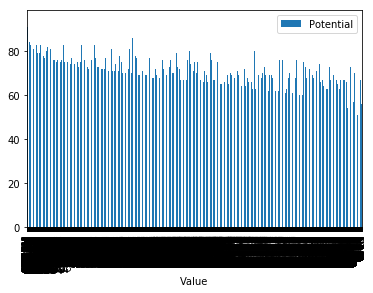

In [14]:
#PLot a graph to show the potential of players to understand what is the frequency of potential
football.plot(x='Value', y='Potential', kind='bar') 
plt.show()

In [15]:
#check the mean of the potential of the whole dataset to classify them in 5 different potential
football['Potential'].mean()

71.19081252433124

In [16]:
#function to classify potential in 5 distinct categories
def rate_players(x):
    if x>55 and x<=65:
         x = 2
    elif x>65 and x<=75:
         x = 3
    elif x>75 and x<=85:
         x = 4
    elif x>85 and x<=95:
         x = 5
    elif x>45 and x<=55:
         x = 1
    return x        
            
for index, row in football.iterrows():
    football['new_Potential'] = football['Potential'].apply(rate_players)

In [17]:
football.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,new_Potential
0,Cristiano Ronaldo,32,Portugal,94,94,€95.5M,€565K,89.0,63.0,89.0,...,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW,5
1,L. Messi,30,Argentina,93,93,€105M,€565K,92.0,48.0,90.0,...,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW,5
2,Neymar,25,Brazil,92,94,€123M,€280K,94.0,56.0,96.0,...,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW,5
3,L. Suárez,30,Uruguay,92,92,€97M,€510K,88.0,78.0,86.0,...,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST,5
4,M. Neuer,31,Germany,92,92,€61M,€230K,58.0,29.0,52.0,...,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK,5


In [18]:
football

,Name,Age,Nationality,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,new_Potential
0,Cristiano Ronaldo,32,Portugal,94,94,€95.5M,€565K,89.0,63.0,89.0,...,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW,5
1,L. Messi,30,Argentina,93,93,€105M,€565K,92.0,48.0,90.0,...,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW,5
2,Neymar,25,Brazil,92,94,€123M,€280K,94.0,56.0,96.0,...,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW,5
3,L. Suárez,30,Uruguay,92,92,€97M,€510K,88.0,78.0,86.0,...,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST,5
4,M. Neuer,31,Germany,92,92,€61M,€230K,58.0,29.0,52.0,...,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK,5
5,R. Lewandowski,28,Poland,91,91,€92M,€355K,79.0,80.0,78.0,...,88.0,19.0,83.0,79.0,42.0,84.0,78.0,87.0,ST,5
6,De Gea,26,Spain,90,92,€64.5M,€215K,57.0,38.0,60.0,...,31.0,13.0,58.0,40.0,21.0,64.0,68.0,13.0,GK,5
7,E. Hazard,26,Belgium,90,91,€90.5M,€295K,93.0,54.0,93.0,...,79.0,22.0,87.0,79.0,27.0,65.0,86.0,79.0,LW,5
8,T. Kroos,27,Germany,90,90,€79M,€340K,60.0,60.0,71.0,...,87.0,69.0,52.0,77.0,82.0,74.0,88.0,82.0,CDM CM,5
9,G. Higuaín,29,Argentina,90,90,€77M,€275K,78.0,50.0,75.0,...,88.0,18.0,80.0,72.0,22.0,85.0,70.0,88.0,ST,5


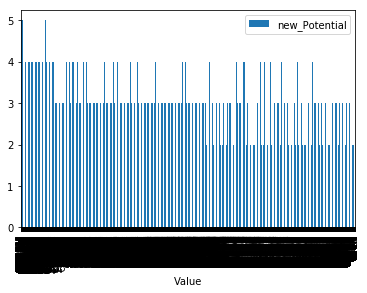

In [19]:
football.plot(x='Value', y='new_Potential', kind='bar') 
plt.show()

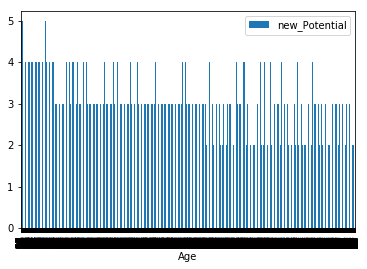

In [20]:
#understand that potential varies with age 
football.plot(x='Age', y='new_Potential', kind='bar') 
plt.show()

In [21]:
football1 = football.filter(['new_Potential','Acceleration'], axis=1)

In [22]:
football1

,new_Potential,Acceleration
0,5,89.0
1,5,92.0
2,5,94.0
3,5,88.0
4,5,58.0
5,5,79.0
6,5,57.0
7,5,93.0
8,5,60.0
9,5,78.0


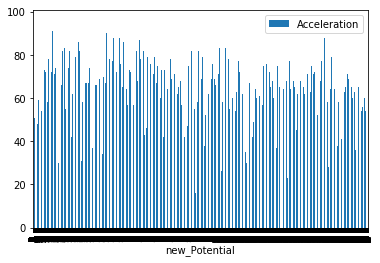

In [23]:
#understand whether potential is varied with acceleration and are these features related
football1.plot(y='Acceleration', x='new_Potential', kind='bar') 
plt.show()

In [24]:
football['Preferred Positions'] = football['Preferred Positions'].astype('str')
football.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,new_Potential
0,Cristiano Ronaldo,32,Portugal,94,94,€95.5M,€565K,89.0,63.0,89.0,...,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW,5
1,L. Messi,30,Argentina,93,93,€105M,€565K,92.0,48.0,90.0,...,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW,5
2,Neymar,25,Brazil,92,94,€123M,€280K,94.0,56.0,96.0,...,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW,5
3,L. Suárez,30,Uruguay,92,92,€97M,€510K,88.0,78.0,86.0,...,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST,5
4,M. Neuer,31,Germany,92,92,€61M,€230K,58.0,29.0,52.0,...,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK,5


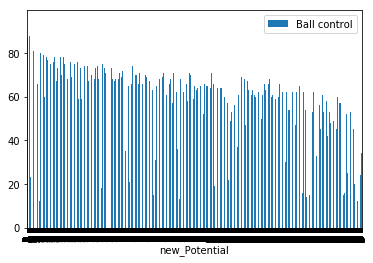

In [25]:
#understand another feature i.e. ball control and whether it is related to the potential
football.plot(y='Ball control', x='new_Potential', kind='bar') 
plt.show()

In [26]:
football.Nationality.unique()

array(['Portugal', 'Argentina', 'Brazil', 'Uruguay', 'Germany', 'Poland',
       'Spain', 'Belgium', 'Chile', 'Croatia', 'Wales', 'Italy',
       'Slovenia', 'France', 'Gabon', 'Sweden', 'Netherlands', 'Denmark',
       'Slovakia', 'England', 'Colombia', 'Austria', 'Greece',
       'Czech Republic', 'Costa Rica', 'Armenia', 'Bosnia Herzegovina',
       'Ivory Coast', 'Senegal', 'Switzerland', 'Morocco', 'Guinea',
       'Egypt', 'Algeria', 'Cameroon', 'Serbia', 'Japan', 'Turkey',
       'Ecuador', 'Montenegro', 'Korea Republic', 'Kenya', 'Iceland',
       'Mexico', 'Norway', 'DR Congo', 'Ukraine', 'Russia', 'Finland',
       'Republic of Ireland', 'United States', 'Venezuela', 'Ghana',
       'Uzbekistan', 'Nigeria', 'Canada', 'Paraguay', 'Romania', 'Albania',
       'Burkina Faso', 'Cape Verde', 'New Zealand', 'Northern Ireland',
       'Syria', 'Peru', 'Scotland', 'Bulgaria', 'Angola', 'Australia',
       'South Africa', 'Jamaica', 'Tunisia', 'Mozambique', 'Iran', 'Mali',
       'Cub

In [27]:
football2 = football.filter(['Nationality','Acceleartion','Aggression','Agility','Balance','Ball control','Composure','Crossing','Dribbling','Finishing'],axis=1) 

In [28]:
football2.head()

,Nationality,Aggression,Agility,Balance,Ball control,Composure,Crossing,Dribbling,Finishing
0,Portugal,63.0,89.0,63.0,93.0,95.0,85.0,91.0,94.0
1,Argentina,48.0,90.0,95.0,95.0,96.0,77.0,97.0,95.0
2,Brazil,56.0,96.0,82.0,95.0,92.0,75.0,96.0,89.0
3,Uruguay,78.0,86.0,60.0,91.0,83.0,77.0,86.0,94.0
4,Germany,29.0,52.0,35.0,48.0,70.0,15.0,30.0,13.0


In [29]:
#infer about how natianality affects the other features for example Belgium players are much better in balance then finishing the goal
football2.groupby(['Nationality']).mean()

,Aggression,Agility,Balance,Ball control,Composure,Crossing,Dribbling,Finishing
Nationality,,,,,,,,
Afghanistan,44.666667,75.333333,70.666667,58.666667,53.333333,48.666667,57.333333,42.333333
Albania,57.457143,65.085714,65.200000,61.117647,59.058824,52.382353,56.735294,49.352941
Algeria,61.122807,66.596491,65.087719,67.210526,65.473684,59.526316,65.000000,53.017544
Angola,61.000000,69.866667,68.266667,63.533333,62.466667,54.400000,62.800000,51.066667
Antigua & Barbuda,44.200000,68.600000,69.800000,58.200000,55.800000,48.400000,59.600000,44.500000
Argentina,55.535417,63.822245,65.213319,59.167883,56.744792,50.909375,57.064786,47.096976
Armenia,57.785714,65.285714,64.857143,65.857143,60.928571,51.428571,63.357143,57.785714
Australia,53.389381,61.814978,62.607930,53.013274,56.083700,45.665198,50.207965,41.559471
Austria,52.920755,60.263158,61.556391,54.424812,53.518797,45.909091,50.708333,42.437736


In [30]:
football['Preferred Positions'] = football['Preferred Positions'].astype('str') 

In [31]:
football = football.rename(columns={'Preferred Positions': 'Position'})

In [32]:
football.dtypes

Name                   object
Age                     int64
Nationality            object
Overall                 int64
Potential               int64
Value                  object
Wage                   object
Acceleration          float64
Aggression            float64
Agility               float64
Balance               float64
Ball control          float64
Composure             float64
Crossing              float64
Curve                 float64
Dribbling             float64
Finishing             float64
Free kick accuracy    float64
Heading accuracy      float64
Interceptions         float64
Jumping               float64
Long passing          float64
Long shots            float64
Marking               float64
Penalties             float64
Positioning           float64
Reactions             float64
Short passing         float64
Shot power            float64
Sliding tackle        float64
Sprint speed          float64
Stamina               float64
Standing tackle       float64
Strength  

In [33]:
football.Position.unique()

array(['ST LW ', 'RW ', 'LW ', 'ST ', 'GK ', 'CDM CM ', 'CB ',
       'RM CM CAM ', 'RM LW ST LM ', 'ST CAM ', 'LW RW ST ', 'CDM CAM CM ',
       'RW CAM ', 'RW RM ', 'CM CDM ', 'LM RM CAM ', 'LB ', 'CM ',
       'LM CM CAM ', 'LM CM ', 'LM RM CAM CM ', 'CM CB LB ', 'LM LB ',
       'ST CAM RW CF ', 'CAM LW ', 'LW ST LM ', 'CAM CM ', 'CDM CB ',
       'ST LW CF ', 'CAM CDM CM ', 'LW LM ', 'RM LM ', 'CDM ', 'LM RW RM ',
       'LB RB CB ', 'LW RW ', 'LW LM RM CAM ', 'RM ', 'LM CF CAM ', 'RB ',
       'LM CAM LW ', 'LM RM CM ', 'CAM LM ', 'CAM RM RW ', 'RM CAM ',
       'CAM LW RW ', 'LM ', 'LM CAM ', 'CAM CF ST ', 'CM CB CDM ',
       'RW ST ', 'RW LW CM ', 'CF CAM ', 'LW CM ', 'RWB RB ', 'CAM ',
       'ST CF ', 'LM ST ', 'CM CAM ', 'CF ST ', 'CB RB ', 'CF CM CAM ',
       'LM CAM RW LW ', 'LM RM ', 'LM RW LW ', 'LM CF RM ', 'CAM LW CM ',
       'ST LM ', 'LM ST RM ', 'RM RW ', 'RM CM ', 'RB CB ', 'CM RW RB ',
       'LM RM RW ', 'RW LW ', 'CM CDM CB ', 'LB CB ', 'ST RM LM ',
       'C

In [34]:
#cleaning the data i.e. classifying each player as to only one position to better understand the capabilities to its first preference
football['Position1'], football['Position2'] = football['Position'].str.split(' ', 1).str

In [35]:
football

,Name,Age,Nationality,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,...,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Position,new_Potential,Position1,Position2
0,Cristiano Ronaldo,32,Portugal,94,94,€95.5M,€565K,89.0,63.0,89.0,...,91.0,92.0,31.0,80.0,85.0,88.0,ST LW,5,ST,LW
1,L. Messi,30,Argentina,93,93,€105M,€565K,92.0,48.0,90.0,...,87.0,73.0,28.0,59.0,90.0,85.0,RW,5,RW,
2,Neymar,25,Brazil,92,94,€123M,€280K,94.0,56.0,96.0,...,90.0,78.0,24.0,53.0,80.0,83.0,LW,5,LW,
3,L. Suárez,30,Uruguay,92,92,€97M,€510K,88.0,78.0,86.0,...,77.0,89.0,45.0,80.0,84.0,88.0,ST,5,ST,
4,M. Neuer,31,Germany,92,92,€61M,€230K,58.0,29.0,52.0,...,61.0,44.0,10.0,83.0,70.0,11.0,GK,5,GK,
5,R. Lewandowski,28,Poland,91,91,€92M,€355K,79.0,80.0,78.0,...,83.0,79.0,42.0,84.0,78.0,87.0,ST,5,ST,
6,De Gea,26,Spain,90,92,€64.5M,€215K,57.0,38.0,60.0,...,58.0,40.0,21.0,64.0,68.0,13.0,GK,5,GK,
7,E. Hazard,26,Belgium,90,91,€90.5M,€295K,93.0,54.0,93.0,...,87.0,79.0,27.0,65.0,86.0,79.0,LW,5,LW,
8,T. Kroos,27,Germany,90,90,€79M,€340K,60.0,60.0,71.0,...,52.0,77.0,82.0,74.0,88.0,82.0,CDM CM,5,CDM,CM
9,G. Higuaín,29,Argentina,90,90,€77M,€275K,78.0,50.0,75.0,...,80.0,72.0,22.0,85.0,70.0,88.0,ST,5,ST,


In [36]:
football.Position1.unique()

array(['ST', 'RW', 'LW', 'GK', 'CDM', 'CB', 'RM', 'CM', 'LM', 'LB', 'CAM',
       'RB', 'CF', 'RWB', 'LWB'], dtype=object)

In [37]:
#classifying each position wrt to a valuor diving it into 4 major sections forward,midefield, defennce and goalkeeper
def rate_position(x):
    if x in ['ST','CF']:
         x = 1
    elif x in ['RW','LW','CDM','RM','LM','CAM']:
         x = 2
    elif x in ['GK']:
         x = 3
    else:
         x=4
    return x        
            
for index, row in football.iterrows():
    football['new_position'] = football['Position1'].apply(rate_position)

In [38]:
football.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,...,Stamina,Standing tackle,Strength,Vision,Volleys,Position,new_Potential,Position1,Position2,new_position
0,Cristiano Ronaldo,32,Portugal,94,94,€95.5M,€565K,89.0,63.0,89.0,...,92.0,31.0,80.0,85.0,88.0,ST LW,5,ST,LW,1
1,L. Messi,30,Argentina,93,93,€105M,€565K,92.0,48.0,90.0,...,73.0,28.0,59.0,90.0,85.0,RW,5,RW,,2
2,Neymar,25,Brazil,92,94,€123M,€280K,94.0,56.0,96.0,...,78.0,24.0,53.0,80.0,83.0,LW,5,LW,,2
3,L. Suárez,30,Uruguay,92,92,€97M,€510K,88.0,78.0,86.0,...,89.0,45.0,80.0,84.0,88.0,ST,5,ST,,1
4,M. Neuer,31,Germany,92,92,€61M,€230K,58.0,29.0,52.0,...,44.0,10.0,83.0,70.0,11.0,GK,5,GK,,3


In [39]:
football.dtypes

Name                   object
Age                     int64
Nationality            object
Overall                 int64
Potential               int64
Value                  object
Wage                   object
Acceleration          float64
Aggression            float64
Agility               float64
Balance               float64
Ball control          float64
Composure             float64
Crossing              float64
Curve                 float64
Dribbling             float64
Finishing             float64
Free kick accuracy    float64
Heading accuracy      float64
Interceptions         float64
Jumping               float64
Long passing          float64
Long shots            float64
Marking               float64
Penalties             float64
Positioning           float64
Reactions             float64
Short passing         float64
Shot power            float64
Sliding tackle        float64
Sprint speed          float64
Stamina               float64
Standing tackle       float64
Strength  

In [40]:
football['Value'] = football['Value'].str.replace('M','')

In [41]:
football

,Name,Age,Nationality,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,...,Stamina,Standing tackle,Strength,Vision,Volleys,Position,new_Potential,Position1,Position2,new_position
0,Cristiano Ronaldo,32,Portugal,94,94,€95.5,€565K,89.0,63.0,89.0,...,92.0,31.0,80.0,85.0,88.0,ST LW,5,ST,LW,1
1,L. Messi,30,Argentina,93,93,€105,€565K,92.0,48.0,90.0,...,73.0,28.0,59.0,90.0,85.0,RW,5,RW,,2
2,Neymar,25,Brazil,92,94,€123,€280K,94.0,56.0,96.0,...,78.0,24.0,53.0,80.0,83.0,LW,5,LW,,2
3,L. Suárez,30,Uruguay,92,92,€97,€510K,88.0,78.0,86.0,...,89.0,45.0,80.0,84.0,88.0,ST,5,ST,,1
4,M. Neuer,31,Germany,92,92,€61,€230K,58.0,29.0,52.0,...,44.0,10.0,83.0,70.0,11.0,GK,5,GK,,3
5,R. Lewandowski,28,Poland,91,91,€92,€355K,79.0,80.0,78.0,...,79.0,42.0,84.0,78.0,87.0,ST,5,ST,,1
6,De Gea,26,Spain,90,92,€64.5,€215K,57.0,38.0,60.0,...,40.0,21.0,64.0,68.0,13.0,GK,5,GK,,3
7,E. Hazard,26,Belgium,90,91,€90.5,€295K,93.0,54.0,93.0,...,79.0,27.0,65.0,86.0,79.0,LW,5,LW,,2
8,T. Kroos,27,Germany,90,90,€79,€340K,60.0,60.0,71.0,...,77.0,82.0,74.0,88.0,82.0,CDM CM,5,CDM,CM,2
9,G. Higuaín,29,Argentina,90,90,€77,€275K,78.0,50.0,75.0,...,72.0,22.0,85.0,70.0,88.0,ST,5,ST,,1


In [42]:
#convertiing value to feed it into numeric to feed into the algorithn if needed
football['Value'] = football['Value'].str.replace('€','')

In [43]:
football['Value'] = football['Value'].apply(pd.to_numeric, errors='coerce')
football.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,...,Stamina,Standing tackle,Strength,Vision,Volleys,Position,new_Potential,Position1,Position2,new_position
0,Cristiano Ronaldo,32,Portugal,94,94,95.5,€565K,89.0,63.0,89.0,...,92.0,31.0,80.0,85.0,88.0,ST LW,5,ST,LW,1
1,L. Messi,30,Argentina,93,93,105.0,€565K,92.0,48.0,90.0,...,73.0,28.0,59.0,90.0,85.0,RW,5,RW,,2
2,Neymar,25,Brazil,92,94,123.0,€280K,94.0,56.0,96.0,...,78.0,24.0,53.0,80.0,83.0,LW,5,LW,,2
3,L. Suárez,30,Uruguay,92,92,97.0,€510K,88.0,78.0,86.0,...,89.0,45.0,80.0,84.0,88.0,ST,5,ST,,1
4,M. Neuer,31,Germany,92,92,61.0,€230K,58.0,29.0,52.0,...,44.0,10.0,83.0,70.0,11.0,GK,5,GK,,3


In [44]:
#check if any column contains null values
football.isnull().any()

Name                  False
Age                   False
Nationality           False
Overall               False
Potential             False
Value                  True
Wage                  False
Acceleration           True
Aggression             True
Agility                True
Balance                True
Ball control           True
Composure              True
Crossing               True
Curve                  True
Dribbling              True
Finishing              True
Free kick accuracy     True
Heading accuracy       True
Interceptions          True
Jumping                True
Long passing           True
Long shots             True
Marking                True
Penalties              True
Positioning            True
Reactions              True
Short passing          True
Shot power             True
Sliding tackle         True
Sprint speed           True
Stamina                True
Standing tackle        True
Strength               True
Vision                 True
Volleys             

In [45]:
#if yes fill that row with 0 as value wrt column
football.fillna(value=0, inplace=True)

In [46]:
football.isnull().any()

Name                  False
Age                   False
Nationality           False
Overall               False
Potential             False
Value                 False
Wage                  False
Acceleration          False
Aggression            False
Agility               False
Balance               False
Ball control          False
Composure             False
Crossing              False
Curve                 False
Dribbling             False
Finishing             False
Free kick accuracy    False
Heading accuracy      False
Interceptions         False
Jumping               False
Long passing          False
Long shots            False
Marking               False
Penalties             False
Positioning           False
Reactions             False
Short passing         False
Shot power            False
Sliding tackle        False
Sprint speed          False
Stamina               False
Standing tackle       False
Strength              False
Vision                False
Volleys             

In [47]:
football.dtypes

Name                   object
Age                     int64
Nationality            object
Overall                 int64
Potential               int64
Value                 float64
Wage                   object
Acceleration          float64
Aggression            float64
Agility               float64
Balance               float64
Ball control          float64
Composure             float64
Crossing              float64
Curve                 float64
Dribbling             float64
Finishing             float64
Free kick accuracy    float64
Heading accuracy      float64
Interceptions         float64
Jumping               float64
Long passing          float64
Long shots            float64
Marking               float64
Penalties             float64
Positioning           float64
Reactions             float64
Short passing         float64
Shot power            float64
Sliding tackle        float64
Sprint speed          float64
Stamina               float64
Standing tackle       float64
Strength  

In [48]:
cols = ['Value','Acceleration', 'Aggression', 'Agility','Balance','Ball control','Composure','Crossing','Curve','Dribbling',
       'Finishing','Free kick accuracy']
football[cols] = football[cols].applymap(np.int64)

In [49]:
cols = ['Heading accuracy','Interceptions','Jumping','Long passing','Long shots','Marking','Penalties','Positioning','Reactions',
       'Short passing','Shot power','Sliding tackle','Sprint speed','Stamina','Standing tackle','Strength','Vision','Volleys']
football[cols] = football[cols].applymap(np.int64)

In [50]:
football.dtypes

Name                  object
Age                    int64
Nationality           object
Overall                int64
Potential              int64
Value                  int64
Wage                  object
Acceleration           int64
Aggression             int64
Agility                int64
Balance                int64
Ball control           int64
Composure              int64
Crossing               int64
Curve                  int64
Dribbling              int64
Finishing              int64
Free kick accuracy     int64
Heading accuracy       int64
Interceptions          int64
Jumping                int64
Long passing           int64
Long shots             int64
Marking                int64
Penalties              int64
Positioning            int64
Reactions              int64
Short passing          int64
Shot power             int64
Sliding tackle         int64
Sprint speed           int64
Stamina                int64
Standing tackle        int64
Strength               int64
Vision        

In [51]:
#since algorithm cannot take features with space in between cleaning the column names with a space
football=football.rename(columns={'Heading accuracy':'Heading_accuracy','Free kick accuracy':'Free_kick_accuracy'})

In [52]:
football=football.rename(columns={'Long shots':'Long_shots'})

In [53]:
football=football.rename(columns={'Long passing':'Long_passing','Long Shots':'Long_shots','Short passing':'Short_Passing','Shot power':'Shot_power','Sliding tackle':'Sliding_tackle','Stading tackle':'Standing_tackle'})

In [54]:
football.Nationality = pd.Categorical(football.Nationality)

In [55]:
#converting country names to categorical variable as regression works best with numbers
football['code'] = football.Nationality.cat.codes

In [56]:
football

,Name,Age,Nationality,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,...,Standing tackle,Strength,Vision,Volleys,Position,new_Potential,Position1,Position2,new_position,code
0,Cristiano Ronaldo,32,Portugal,94,94,95,€565K,89,63,89,...,31,80,85,88,ST LW,5,ST,LW,1,121
1,L. Messi,30,Argentina,93,93,105,€565K,92,48,90,...,28,59,90,85,RW,5,RW,,2,5
2,Neymar,25,Brazil,92,94,123,€280K,94,56,96,...,24,53,80,83,LW,5,LW,,2,18
3,L. Suárez,30,Uruguay,92,92,97,€510K,88,78,86,...,45,80,84,88,ST,5,ST,,1,158
4,M. Neuer,31,Germany,92,92,61,€230K,58,29,52,...,10,83,70,11,GK,5,GK,,3,58
5,R. Lewandowski,28,Poland,91,91,92,€355K,79,80,78,...,42,84,78,87,ST,5,ST,,1,120
6,De Gea,26,Spain,90,92,64,€215K,57,38,60,...,21,64,68,13,GK,5,GK,,3,137
7,E. Hazard,26,Belgium,90,91,90,€295K,93,54,93,...,27,65,86,79,LW,5,LW,,2,12
8,T. Kroos,27,Germany,90,90,79,€340K,60,60,71,...,82,74,88,82,CDM CM,5,CDM,CM,2,58
9,G. Higuaín,29,Argentina,90,90,77,€275K,78,50,75,...,22,85,70,88,ST,5,ST,,1,5


In [57]:
football=football.rename(columns={'Ball control':'Ball_control'})

In [58]:
football=football.rename(columns={'Sprint speed':'Sprint_speed','Standing tackle':'Standing_tackle'})

In [59]:
football.dtypes

Name                    object
Age                      int64
Nationality           category
Overall                  int64
Potential                int64
Value                    int64
Wage                    object
Acceleration             int64
Aggression               int64
Agility                  int64
Balance                  int64
Ball_control             int64
Composure                int64
Crossing                 int64
Curve                    int64
Dribbling                int64
Finishing                int64
Free_kick_accuracy       int64
Heading_accuracy         int64
Interceptions            int64
Jumping                  int64
Long_passing             int64
Long_shots               int64
Marking                  int64
Penalties                int64
Positioning              int64
Reactions                int64
Short_Passing            int64
Shot_power               int64
Sliding_tackle           int64
Sprint_speed             int64
Stamina                  int64
Standing

In [71]:
#removing keepers as they are a anamoly
football12 = football.query('new_position != 3')
football12

,Name,Age,Nationality,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,...,Standing_tackle,Strength,Vision,Volleys,Position,new_Potential,Position1,Position2,new_position,code
0,Cristiano Ronaldo,32,Portugal,94,94,95,€565K,89,63,89,...,31,80,85,88,ST LW,5,ST,LW,1,121
1,L. Messi,30,Argentina,93,93,105,€565K,92,48,90,...,28,59,90,85,RW,5,RW,,2,5
2,Neymar,25,Brazil,92,94,123,€280K,94,56,96,...,24,53,80,83,LW,5,LW,,2,18
3,L. Suárez,30,Uruguay,92,92,97,€510K,88,78,86,...,45,80,84,88,ST,5,ST,,1,158
5,R. Lewandowski,28,Poland,91,91,92,€355K,79,80,78,...,42,84,78,87,ST,5,ST,,1,120
7,E. Hazard,26,Belgium,90,91,90,€295K,93,54,93,...,27,65,86,79,LW,5,LW,,2,12
8,T. Kroos,27,Germany,90,90,79,€340K,60,60,71,...,82,74,88,82,CDM CM,5,CDM,CM,2,58
9,G. Higuaín,29,Argentina,90,90,77,€275K,78,50,75,...,22,85,70,88,ST,5,ST,,1,5
10,Sergio Ramos,31,Spain,90,90,52,€310K,75,84,79,...,89,81,63,66,CB,5,CB,,4,137
11,K. De Bruyne,26,Belgium,89,92,83,€285K,76,68,80,...,51,73,90,82,RM CM CAM,5,RM,CM CAM,2,12


In [77]:
#classifying positions into attack or defense as the algorithm understand only 1 or 0 and predicts output accordingly
def rate_position(x):
    if x == 1:
         x = 0
    elif x == 2:
         x = 1
    elif x == 4:
         x = 1
    return x

for index, row in football12.iterrows():
    football12['position5'] = football12['new_position'].apply(rate_position)

C:\Users\daala\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [78]:
football12

,Name,Age,Nationality,Overall,Potential,Value,Wage,Acceleration,Aggression,Agility,...,Strength,Vision,Volleys,Position,new_Potential,Position1,Position2,new_position,code,position5
0,Cristiano Ronaldo,32,Portugal,94,94,95,€565K,89,63,89,...,80,85,88,ST LW,5,ST,LW,1,121,0
1,L. Messi,30,Argentina,93,93,105,€565K,92,48,90,...,59,90,85,RW,5,RW,,2,5,1
2,Neymar,25,Brazil,92,94,123,€280K,94,56,96,...,53,80,83,LW,5,LW,,2,18,1
3,L. Suárez,30,Uruguay,92,92,97,€510K,88,78,86,...,80,84,88,ST,5,ST,,1,158,0
5,R. Lewandowski,28,Poland,91,91,92,€355K,79,80,78,...,84,78,87,ST,5,ST,,1,120,0
7,E. Hazard,26,Belgium,90,91,90,€295K,93,54,93,...,65,86,79,LW,5,LW,,2,12,1
8,T. Kroos,27,Germany,90,90,79,€340K,60,60,71,...,74,88,82,CDM CM,5,CDM,CM,2,58,1
9,G. Higuaín,29,Argentina,90,90,77,€275K,78,50,75,...,85,70,88,ST,5,ST,,1,5,0
10,Sergio Ramos,31,Spain,90,90,52,€310K,75,84,79,...,81,63,66,CB,5,CB,,4,137,1
11,K. De Bruyne,26,Belgium,89,92,83,€285K,76,68,80,...,73,90,82,RM CM CAM,5,RM,CM CAM,2,12,1


In [80]:
football12.dtypes

Name                    object
Age                      int64
Nationality           category
Overall                  int64
Potential                int64
Value                    int64
Wage                    object
Acceleration             int64
Aggression               int64
Agility                  int64
Balance                  int64
Ball_control             int64
Composure                int64
Crossing                 int64
Curve                    int64
Dribbling                int64
Finishing                int64
Free_kick_accuracy       int64
Heading_accuracy         int64
Interceptions            int64
Jumping                  int64
Long_passing             int64
Long_shots               int64
Marking                  int64
Penalties                int64
Positioning              int64
Reactions                int64
Short_Passing            int64
Shot_power               int64
Sliding_tackle           int64
Sprint_speed             int64
Stamina                  int64
Standing

In [82]:
football13 = football12[['Age','Acceleration','Aggression','Agility','Balance','Ball_control','Composure','Curve','Dribbling', \
                      'Finishing','Free_kick_accuracy','Heading_accuracy','Interceptions','Jumping','Long_passing', \
                      'Long_shots','Marking','Penalties','Positioning','Reactions','Short_Passing','Shot_power','Sliding_tackle',\
                      'Sprint_speed','Stamina','Standing_tackle','Strength','Vision','Volleys','position5']]
football13

,Age,Acceleration,Aggression,Agility,Balance,Ball_control,Composure,Curve,Dribbling,Finishing,...,Short_Passing,Shot_power,Sliding_tackle,Sprint_speed,Stamina,Standing_tackle,Strength,Vision,Volleys,position5
0,32,89,63,89,63,93,95,81,91,94,...,83,94,23,91,92,31,80,85,88,0
1,30,92,48,90,95,95,96,89,97,95,...,88,85,26,87,73,28,59,90,85,1
2,25,94,56,96,82,95,92,81,96,89,...,81,80,33,90,78,24,53,80,83,1
3,30,88,78,86,60,91,83,86,86,94,...,83,87,38,77,89,45,80,84,88,0
5,28,79,80,78,80,89,87,77,85,91,...,83,88,19,83,79,42,84,78,87,0
7,26,93,54,93,91,92,87,82,93,83,...,86,79,22,87,79,27,65,86,79,1
8,27,60,60,71,69,89,85,85,79,76,...,90,87,69,52,77,82,74,88,82,1
9,29,78,50,75,69,85,86,74,84,91,...,75,88,18,80,72,22,85,70,88,0
10,31,75,84,79,60,84,80,73,61,60,...,78,79,91,77,84,89,81,63,66,1
11,26,76,68,80,75,87,84,83,85,83,...,90,85,40,75,87,51,73,90,82,1


In [87]:
#forming a matrice with final value to predict and its respective features to feed into the algorithm
#final prediction value being the position and rest other to be attributes
y, X = dmatrices('position5 ~ Age + Acceleration + Aggression + Agility + Balance + Ball_control + Composure + Curve + Dribbling + \
Finishing + Free_kick_accuracy + Heading_accuracy + Interceptions + Jumping + Long_passing + \
Long_shots + Marking + Penalties + Positioning + Reactions + Short_Passing + Shot_power + Sliding_tackle + \
Sprint_speed + Stamina + Standing_tackle + Strength + Vision + Volleys',
                 
football13, return_type="dataframe")

print (X.columns) 

Index(['Intercept', 'Age', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball_control', 'Composure', 'Curve', 'Dribbling', 'Finishing',
       'Free_kick_accuracy', 'Heading_accuracy', 'Interceptions', 'Jumping',
       'Long_passing', 'Long_shots', 'Marking', 'Penalties', 'Positioning',
       'Reactions', 'Short_Passing', 'Shot_power', 'Sliding_tackle',
       'Sprint_speed', 'Stamina', 'Standing_tackle', 'Strength', 'Vision',
       'Volleys'],
      dtype='object')


In [88]:
y = np.ravel(y)

In [92]:
#split the model in test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [93]:
#develop and fit the model
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [94]:
#predict the results of test dataset
y_pred = model.predict(X_test)

In [95]:
y_pred

array([ 1.,  0.,  1., ...,  1.,  1.,  1.])

In [96]:
#accuracy of the model
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92
